Files already downloaded and verified
Files already downloaded and verified
Starting training...


Epoch 1/15: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]


Epoch 1/15 | Train Loss: 1.2303 | Train Acc: 55.16% | Test Loss: 0.9933 | Test Acc: 65.69%


Epoch 2/15: 100%|██████████| 391/391 [00:26<00:00, 14.82it/s]


Epoch 2/15 | Train Loss: 0.8165 | Train Acc: 71.18% | Test Loss: 0.8146 | Test Acc: 71.23%


Epoch 3/15: 100%|██████████| 391/391 [00:26<00:00, 14.91it/s]


Epoch 3/15 | Train Loss: 0.6850 | Train Acc: 76.08% | Test Loss: 0.7176 | Test Acc: 75.22%


Epoch 4/15: 100%|██████████| 391/391 [00:26<00:00, 14.79it/s]


Epoch 4/15 | Train Loss: 0.5934 | Train Acc: 79.16% | Test Loss: 0.7039 | Test Acc: 75.33%


Epoch 5/15: 100%|██████████| 391/391 [00:26<00:00, 14.82it/s]


Epoch 5/15 | Train Loss: 0.5233 | Train Acc: 81.83% | Test Loss: 0.6068 | Test Acc: 78.81%


Epoch 6/15: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]


Epoch 6/15 | Train Loss: 0.4696 | Train Acc: 83.63% | Test Loss: 0.6125 | Test Acc: 79.27%


Epoch 7/15: 100%|██████████| 391/391 [00:25<00:00, 15.06it/s]


Epoch 7/15 | Train Loss: 0.4279 | Train Acc: 85.19% | Test Loss: 0.6275 | Test Acc: 78.69%


Epoch 8/15: 100%|██████████| 391/391 [00:25<00:00, 15.16it/s]


Epoch 8/15 | Train Loss: 0.3908 | Train Acc: 86.45% | Test Loss: 0.5045 | Test Acc: 82.82%


Epoch 9/15: 100%|██████████| 391/391 [00:25<00:00, 15.57it/s]


Epoch 9/15 | Train Loss: 0.3544 | Train Acc: 87.66% | Test Loss: 0.5436 | Test Acc: 81.59%


Epoch 10/15: 100%|██████████| 391/391 [00:26<00:00, 14.95it/s]


Epoch 10/15 | Train Loss: 0.3220 | Train Acc: 88.65% | Test Loss: 0.6272 | Test Acc: 79.81%


Epoch 11/15: 100%|██████████| 391/391 [00:25<00:00, 15.22it/s]


Epoch 11/15 | Train Loss: 0.2946 | Train Acc: 89.54% | Test Loss: 0.5577 | Test Acc: 81.94%


Epoch 12/15: 100%|██████████| 391/391 [00:25<00:00, 15.05it/s]


Epoch 12/15 | Train Loss: 0.2692 | Train Acc: 90.59% | Test Loss: 0.5528 | Test Acc: 82.44%


Epoch 13/15: 100%|██████████| 391/391 [00:25<00:00, 15.11it/s]


Epoch 13/15 | Train Loss: 0.2456 | Train Acc: 91.26% | Test Loss: 0.5029 | Test Acc: 84.15%


Epoch 14/15: 100%|██████████| 391/391 [00:25<00:00, 15.39it/s]


Epoch 14/15 | Train Loss: 0.2238 | Train Acc: 91.93% | Test Loss: 0.5342 | Test Acc: 83.44%


Epoch 15/15: 100%|██████████| 391/391 [00:25<00:00, 15.28it/s]


Epoch 15/15 | Train Loss: 0.2074 | Train Acc: 92.55% | Test Loss: 0.5331 | Test Acc: 83.30%

Plotting training history...


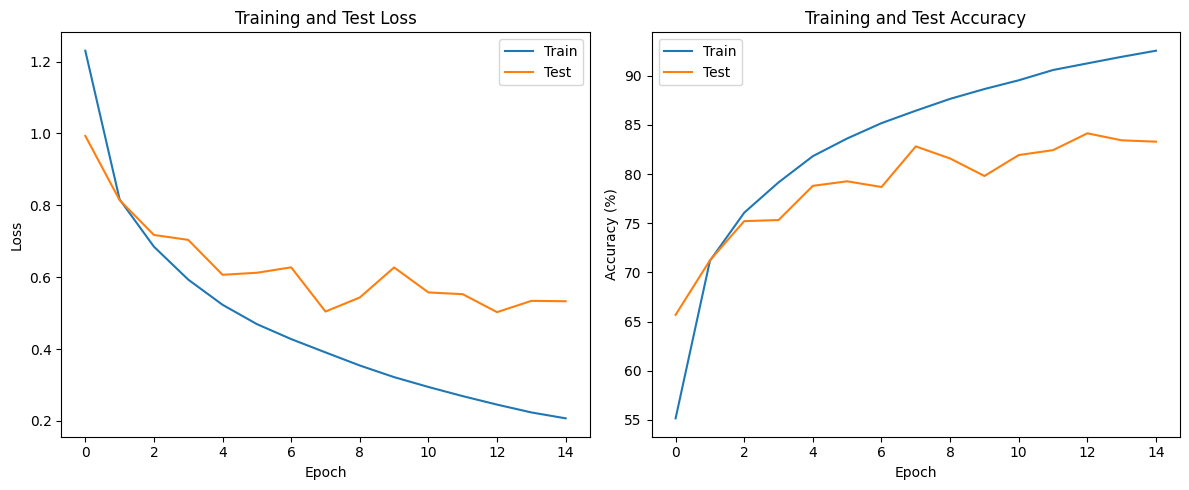


Visualizing predictions...


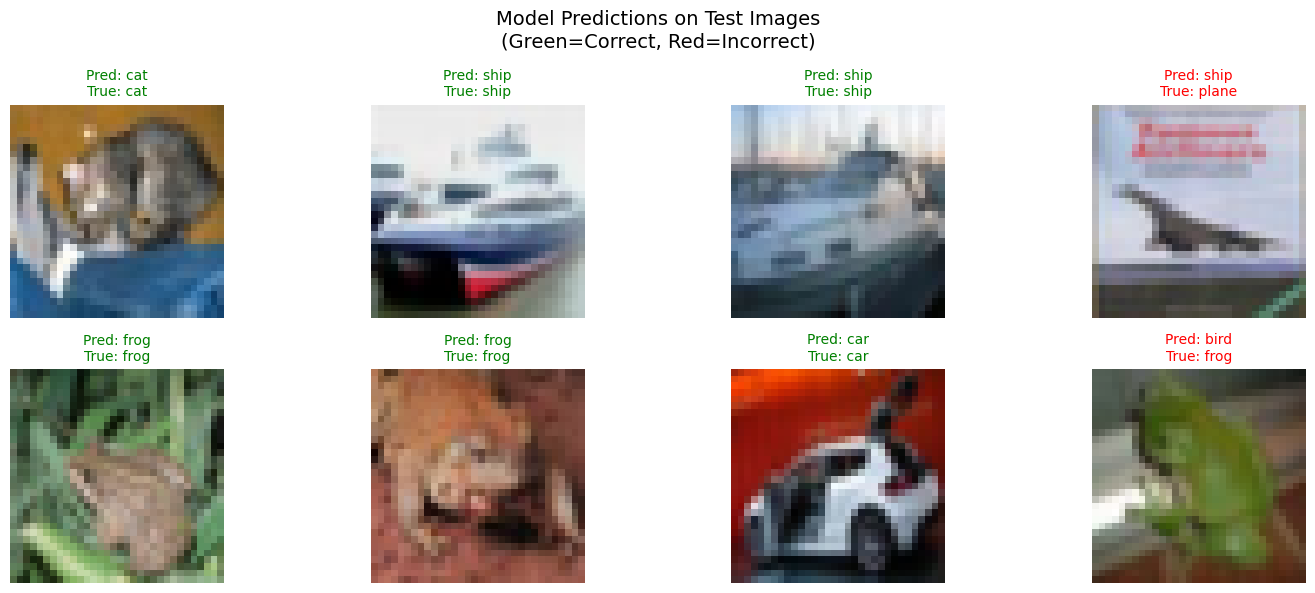


Generating confusion matrix...


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000018224D24550>
Traceback (most recent call last):
  File "c:\Users\12\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\12\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


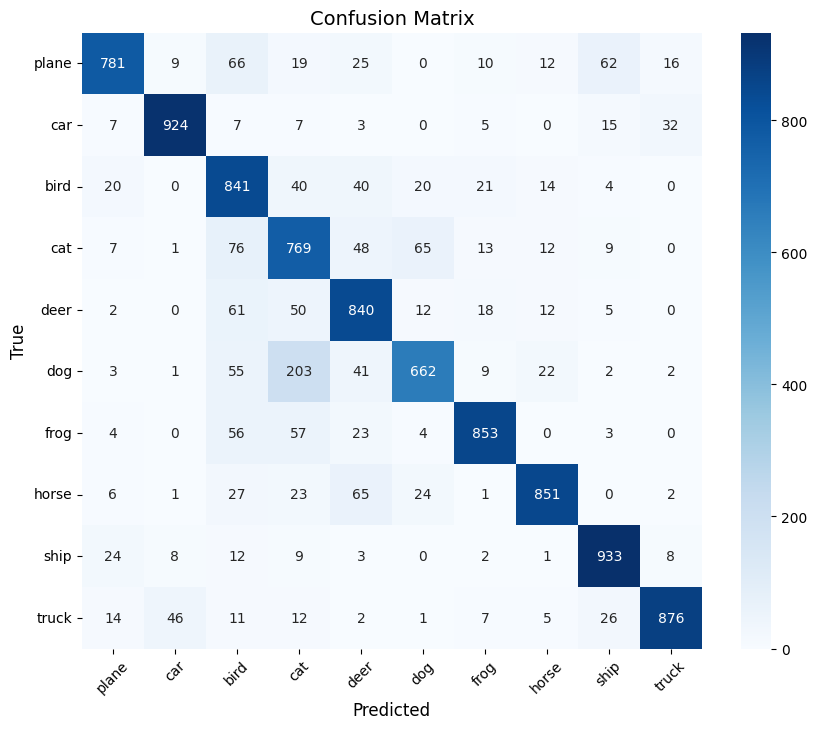

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=128, shuffle=False, num_workers=2)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 2. CNN Model Definition
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 4 * 4, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize model
model = CIFAR10_CNN().to(device)

# 3. Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Function with History Tracking
def train_model(model, train_loader, test_loader, epochs=50):
    history = {
        'train_loss': [],
        'train_acc': [],
        'test_loss': [],
        'test_acc': []
    }
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        # Calculate training metrics
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        
        # Evaluation
        test_loss, test_acc = evaluate(model, test_loader)
        history['test_loss'].append(test_loss)
        history['test_acc'].append(test_acc)
        
        print(f'Epoch {epoch+1}/{epochs} | '
              f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | '
              f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')
    
    return history

# 5. Evaluation Function
def evaluate(model, test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    
    test_loss = running_loss / len(test_loader)
    test_acc = 100. * correct / total
    return test_loss, test_acc

# 6. Visualization Functions
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train')
    plt.plot(history['test_loss'], label='Test')
    plt.title('Training and Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train')
    plt.plot(history['test_acc'], label='Test')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def visualize_predictions(model, test_loader, num_images=8):
    # Get a batch of test images
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images[:num_images], labels[:num_images]
    
    # Get predictions
    with torch.no_grad():
        outputs = model(images.to(device))
        _, preds = torch.max(outputs, 1)
    
    # Denormalize images
    images = images / 2 + 0.5  # Unnormalize
    
    # Plot
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        plt.imshow(img)
        
        # Color code correct/incorrect predictions
        color = 'green' if preds[i] == labels[i] else 'red'
        plt.title(f'Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}', 
                 color=color, fontsize=10)
        plt.axis('off')
    
    plt.suptitle('Model Predictions on Test Images\n(Green=Correct, Red=Incorrect)', 
                fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# 7. Main Execution
if __name__ == '__main__':
    # Train the model and track history
    print("Starting training...")
    history = train_model(model, train_loader, test_loader, epochs=15)
    
    # Plot training history
    print("\nPlotting training history...")
    plot_training_history(history)
    
    # Visualize predictions
    print("\nVisualizing predictions...")
    visualize_predictions(model, test_loader, num_images=8)
    
    # Plot confusion matrix
    print("\nGenerating confusion matrix...")
    plot_confusion_matrix(model, test_loader)